In [2]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from config.defaults import cfg

In [7]:
images = os.listdir(os.path.join('..', cfg.DATASET.ROOT, cfg.DATASET.IMAGE_10K_ROOT, 'train'))

In [8]:
len(images)

7000

In [9]:
masks = os.listdir(os.path.join('..', cfg.DATASET.ROOT, cfg.DATASET.INSTANCE_SEGMENTATION_ROOT, 'train'))


In [11]:
len(masks)

7000

In [14]:
polygon_path = os.path.join('..', cfg.DATASET.ROOT, cfg.DATASET.INSTANCE_SEGMENTATION_POLYGON_ROOT, 'ins_seg_train.json')
print(polygon_path)

..\dataset/bdd100k\labels/ins_seg/polygons\ins_seg_train.json


In [13]:
os.listdir(polygon_path)

['ins_seg_train.json', 'ins_seg_val.json']

In [17]:
drivable_mask = os.listdir(os.path.join('..', cfg.DATASET.ROOT, cfg.DATASET.DRIVABLE_AREA_MASK, 'train'))

In [18]:
len(drivable_mask)

70000

In [20]:
images[0]

'0004a4c0-d4dff0ad.jpg'

In [19]:
drivable_mask[0]

'0000f77c-6257be58.png'

In [27]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [24]:
images_path = '../dataset/bdd100k/images/10k/bdd100k/images/10k/train'
drivable_masks_path = '../dataset/bdd100k/labels/drivable/colormaps/train'
instance_segmentation_path = '../dataset/bdd100k/labels/ins_seg/colormaps/train'

In [61]:
images_path_test = '../dataset/bdd100k/images/10k/bdd100k/images/10k/val'
drivable_masks_path_test = '../dataset/bdd100k/labels/drivable/colormaps/val'
instance_segmentation_path_test = '../dataset/bdd100k/labels/ins_seg/colormaps/val'

In [25]:
images = os.listdir(images_path)
drivable_masks = os.listdir(drivable_masks_path)
instance_seg_masks = os.listdir(instance_segmentation_path)

In [26]:
print(len(images), len(drivable_masks), len(instance_seg_masks))

7000 70000 7000


In [62]:
images_test = os.listdir(images_path_test)
drivable_masks_test = os.listdir(drivable_masks_path_test)
instance_seg_masks_test = os.listdir(instance_segmentation_path_test)

In [63]:
print(len(images_test), len(drivable_masks_test), len(instance_seg_masks_test))

1000 10000 1000


In [67]:
intersetction_list_test = intersection(images_path, [ mask.replace('.png', '.jpg') for mask in drivable_masks_path_test])
len(intersetction_list_test)

51

In [31]:
intersetction_list = intersection(images, [ mask.replace('.png', '.jpg') for mask in drivable_masks])
len(intersetction_list)

2976

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_images, test_images = train_test_split(intersetction_list, test_size=0.2, random_state=42)

In [70]:
len(train_images)

2380

In [71]:
len(test_images)

596

In [72]:
test_images, val_image = train_test_split(test_images, test_size=0.5, random_state=42)
print(len(test_images), len(val_image))

298 298


In [35]:
intersetction_list[0]

'00054602-3bf57337.jpg'

In [58]:
random_image = random.choice(intersetction_list)
random_image_path = os.path.join(images_path, random_image)
drivable_mask = os.path.join(drivable_masks_path, random_image.replace('.jpg', '.png'))
instance_mask = os.path.join(instance_segmentation_path, random_image.replace('.jpg', '.png'))

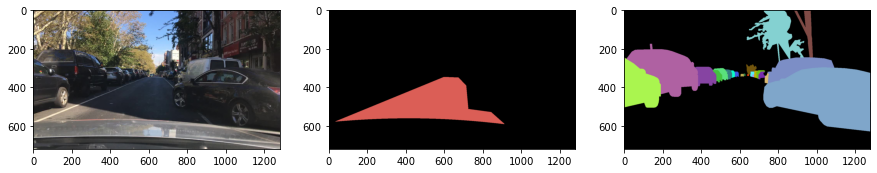

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(Image.open(random_image_path))
ax[1].imshow(Image.open(drivable_mask))
ax[2].imshow(Image.open(instance_mask))
plt.show()

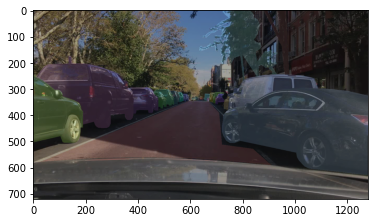

In [60]:
plt.imshow(Image.open(random_image_path))
plt.imshow(Image.open(drivable_mask), alpha=0.2)
plt.imshow(Image.open(instance_mask), alpha=0.2)